# Validation of number of local maxima ($N_{max}$) metric 

In this notebook, we validate the number of local maxima ($N_{max}$) metric using synthetic $NK$ landscapes and RMF landscape models. Specifically, we will look at the affect on $N_{max}$ of:      
   1. landscape ruggedness 
   2. sequence length 
   3. fitness scale
   4. incomplete datasets/sampling affects 
    


In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
#css_styling()

In [13]:
# imports
import numpy as np
import sys
sys.path.append('../')
from landscape_models import make_NK, make_RMF
import matplotlib.pyplot as plt
import utils
import pandas as pd
from ruggedness import NMaximaEstimator
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [14]:
n_max_th = [20**(N-1) for N in range(1,10)]

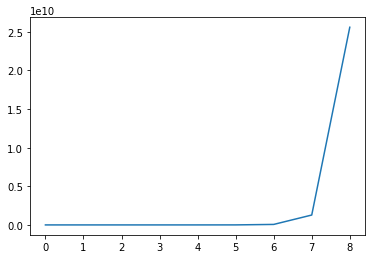

In [15]:
plt.plot(n_max_th)

In [8]:
n_max_th

[1, 20, 400, 8000, 160000, 3200000, 64000000, 1280000000, 25600000000]

In [9]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## $N_{max}$ and landscape ruggedness

In [3]:
#parameters
ALPHABET = 'ACTHL'
SEQ_LEN  = 5
K_VALUES = [0,1,2,3,4]
REPL     = 5
DIST     = np.random.uniform

In [11]:
results = []
for K in tqdm(K_VALUES):
    repls = []
    for replicate in range(REPL): 
        landscape = make_NK(SEQ_LEN, K, ALPHABET, DIST)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit()
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)

  0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)

In [43]:
rug_vals = [K/SEQ_LEN for K in K_VALUES]

In [44]:
rug_vals

[0.0, 0.2, 0.4, 0.6, 0.8]

Text(0.5, 1.0, '$N_{max}$ for different ruggedness values of $NK$ landscapes')

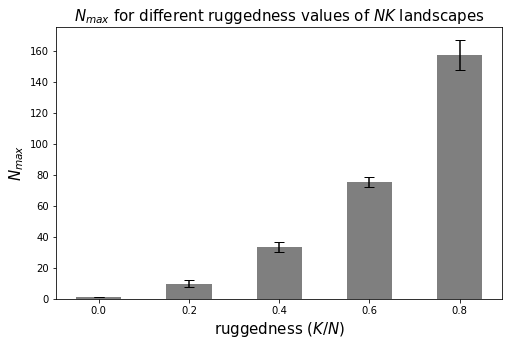

In [54]:
_ = plt.figure(figsize=(8,5))
plt.bar(rug_vals, mean_results, color='k', alpha=0.5, width=0.1)
plt.errorbar(rug_vals, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')
plt.xlabel('ruggedness ($K/N)$', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.title('$N_{max}$ for different ruggedness values of $NK$ landscapes', fontsize=15)

From the above graph, we can see that as $K$ increases, so too does $N_{max}$. The relationship does not look strictly linear. Note here that the sequence length remains the same. 

## $N_{max}$ and sequence length

Next, we will look at how $N_{max}$ changes with sequence length. Specifically, we want to be able to see that how sequence length affects $N_{max}$. To do this, we will generate a family of landscapes of different length, but constant $K$. 



In [8]:
#parameters
ALPHABET = 'ACTH'
SEQ_LENS = [4,5,6,7,8] 
K_VALUE  = 1
REPL     = 5
DIST     = np.random.uniform

In [104]:
results = []
for N in tqdm(SEQ_LENS): 
    repls = []
    for replicate in range(REPL):
        landscape = make_NK(N, K_VALUE, ALPHABET, DIST)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit(multiprocessing=True)
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)
        

  0%|          | 0/5 [00:00<?, ?it/s]

Process ForkPoolWorker-231:
Process ForkPoolWorker-232:
Process ForkPoolWorker-187:
Process ForkPoolWorker-159:
Process ForkPoolWorker-183:
Process ForkPoolWorker-208:
Process ForkPoolWorker-229:
Process ForkPoolWorker-155:
Process ForkPoolWorker-171:
Process ForkPoolWorker-163:
Process ForkPoolWorker-169:
Process ForkPoolWorker-173:
Process ForkPoolWorker-177:
Process ForkPoolWorker-205:
Process ForkPoolWorker-219:
Process ForkPoolWorker-192:
Process ForkPoolWorker-213:
Process ForkPoolWorker-161:
Process ForkPoolWorker-228:
Process ForkPoolWorker-211:
Process ForkPoolWorker-181:
Process ForkPoolWorker-153:
Process ForkPoolWorker-195:
Process ForkPoolWorker-217:
Process ForkPoolWorker-197:
Process ForkPoolWorker-214:
Process ForkPoolWorker-151:
Process ForkPoolWorker-230:
Process ForkPoolWorker-218:
Process ForkPoolWorker-162:
Process ForkPoolWorker-190:
Process ForkPoolWorker-164:
Process ForkPoolWorker-198:
Process ForkPoolWorker-200:
Process ForkPoolWorker-209:
Process ForkPoolWork

  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing

  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/p

KeyboardInterrupt: 

  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahaka

  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/mahakaran/miniconda3/lib/python3.7

### No normalisation, correcting for ruggedness

As sequence length $N$ and alphabet size $|A|$ increases, the sequence space space size $|S|$ also increases; specifically, there is an exponential relationship between $N$ at $|S|$, and a polynomial relationship between $|A|$ and $|S|$: 

$$N_{vertices} = |A|^N$$

$$\text{degree} = N (|A|-1)$$
______________

As $|S|$ increases at constant ruggedness, we expect an increase in $N_{max}$ -- whether this increase is linear or some other relationship, we do not know. More specifically, as $N$ increases we expect an increase on the order $O(p^N)$, whereas when $|A|$ increases we expect an increase on the order $O(|A|^{N=n})$ 

__________

Dividing $N$ is equavalent to dividing by $\text{degree}$ if $|A|$ is constant; however, if $|A|$ is not constant, dividing by $\text{degree}$ is more appropriate. Therefore this will be the default hereafter. 

Therefore, we need a way for normalising this. Firstly, we will present the data without normalisation. We will correct the data, however, for ruggedness (because the data is calculated at slightly different ruggedness values, we need to account for this). Ruggedness in the $NK$ model is given by $K/N$ (ref?). Therefore, for all our values of $N$ we calculate this ruggedness. Given that our objective is to account for ruggedness, we scale the obtained values of $N_{max}$ 

In [4]:
def get_degree(N, A): 
    return (N*(A-1))

In [98]:
get_degree(10, 20)

190

In [99]:
mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)

In [100]:
degrees = np.array([get_degree(i, len(ALPHABET)) for i in SEQ_LENS])

In [101]:
n = np.divide(mean_results, degrees)

<BarContainer object of 5 artists>

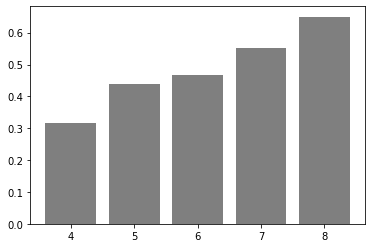

In [102]:
plt.bar(SEQ_LENS, n, color='k', alpha=0.5)


In [90]:
degrees

[12, 15, 18, 21, 24]

In [88]:
ruggednesses = np.array([K_VALUE/SEQ_LEN for SEQ_LEN in SEQ_LENS])
rug_correction_factors = minmax_scale(rugged)
corrected = mean_results+ np.multiply(mean_results, rug_correction_factor)

In [72]:
m = 1-ruggedness/np.max(ruggedness)
m

array([0.        , 0.2       , 0.33333333, 0.42857143, 0.5       ])

In [73]:
n = mean_results+ np.multiply(mean_results, m)

In [74]:
n

array([ 3.8       ,  7.92      , 11.2       , 16.57142857, 23.4       ])

In [75]:
mean_results

array([ 3.8,  6.6,  8.4, 11.6, 15.6])

In [66]:
rug_correction_factors

array([1.        , 0.6       , 0.33333333, 0.14285714, 0.        ])

In [65]:
ruggedness

array([0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ])

Text(0.5, 1.0, '$N_{max}$ at different $N$ values for constant $K$ (no ruggedness correction)')

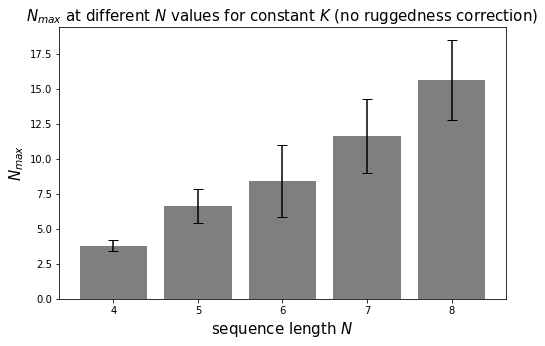

In [61]:
_ = plt.figure(figsize=(8,5))
plt.bar(SEQ_LENS, mean_results, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')
plt.xlabel('sequence length $N$', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.title('$N_{max}$ at different $N$ values for constant $K$ (no ruggedness correction)', fontsize=15)

Text(0.5, 1.0, '$N_{max}$ at different $N$ values for constant ruggedness (ruggedness correction)')

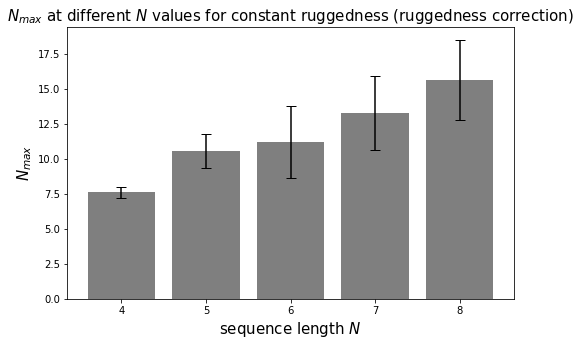

In [63]:
_ = plt.figure(figsize=(8,5))
plt.bar(SEQ_LENS, corrected, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, corrected, yerr=std_results, linestyle='', capsize=5, c='k')
plt.xlabel('sequence length $N$', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.title('$N_{max}$ at different $N$ values for constant ruggedness (ruggedness correction)', fontsize=15)

### Normalisation by sequence length, correcting for ruggedness

In [57]:
seq_norm = np.divide(mean_results, np.array(SEQ_LENS))
err_norm = np.divide(std_results, mean_results) #get percentage error (percentage of the value of mean)

Text(0.5, 1.0, 'Normalised $N_{max}$ at different $N$ values for constant ruggedness')

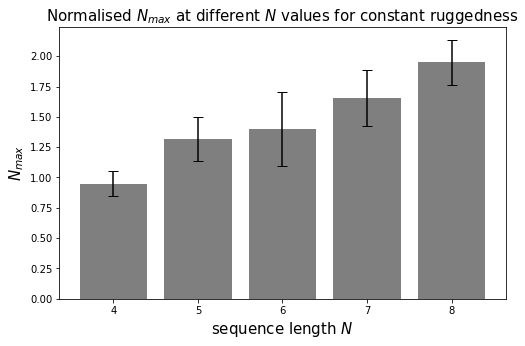

In [64]:
_ = plt.figure(figsize=(8,5))
plt.bar(SEQ_LENS, seq_norm, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, seq_norm, yerr=err_norm, linestyle='', capsize=5, c='k')
plt.xlabel('sequence length $N$', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.title('Normalised $N_{max}$ at different $N$ values for constant ruggedness', fontsize=15)

In [58]:
ruggedness = np.array([K_VALUE/SEQ_LEN for SEQ_LEN in SEQ_LENS])
rug_correction_factors = minmax_scale(rugged)
corrected = seq_norm+ np.multiply(seq_norm, rug_correction_factor)

In [ ]:
#what is the rationale for the above? 

Text(0.5, 1.0, 'Normalised $N_{max}$ at different $N$ values for constant ruggedness')

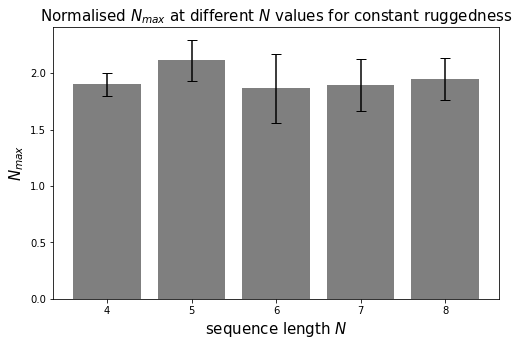

In [56]:
_ = plt.figure(figsize=(8,5))
plt.bar(SEQ_LENS, corrected, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, corrected, yerr=err_norm, linestyle='', capsize=5, c='k')
plt.xlabel('sequence length $N$', fontsize=15)
plt.ylabel('$N_{max}$', fontsize=15)
plt.title('Normalised $N_{max}$ at different $N$ values for constant ruggedness', fontsize=15)

In [5]:
make_RMF??
DIST = np.random.normal

In [9]:
results = []
for N in tqdm(SEQ_LENS): 
    repls = []
    for replicate in range(REPL):
        landscape = make_RMF(N, ALPHABET, DIST)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit(multiprocessing=True)
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
#how underlying distributions interact with the graph structure is interesting in itself and probably a PhD

In [11]:
mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)

In [12]:
mean_results

array([ 4.6,  9.8, 17.4, 39.2, 88.2])

<ErrorbarContainer object of 3 artists>

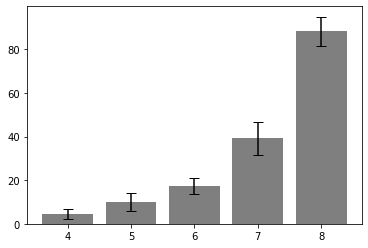

In [16]:
plt.bar(SEQ_LENS, mean_results, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')


In [35]:
#seems to follow a geometric progression with common ratio 2
progression = [2**i for i in range(len(SEQ_LENS))]

In [36]:
progression

[1, 2, 4, 8, 16]

<BarContainer object of 5 artists>

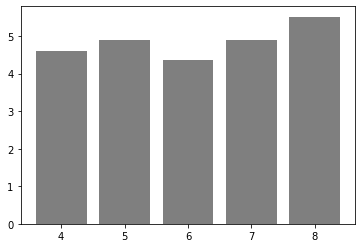

In [38]:
geo_norm = np.divide(mean_results, np.array(progression))
plt.bar(SEQ_LENS, geo_norm, color='k', alpha=0.5)


In [39]:
#VOILA!!!!! and WTF

In [24]:
seq_norm = np.divide(mean_results, np.array(SEQ_LENS))
err_norm = np.multiply(np.divide(std_results, mean_results), seq_norm)

<ErrorbarContainer object of 3 artists>

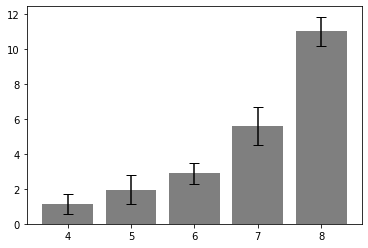

In [25]:
plt.bar(SEQ_LENS, seq_norm, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, seq_norm, yerr=err_norm, linestyle='', capsize=5, c='k')

In [26]:
space_sizes = np.array([len(ALPHABET)**i for i in SEQ_LENS])
space_norm = np.divide(mean_results, space_sizes)
space_err  =  np.multiply(np.divide(std_results, mean_results), space_norm)

<ErrorbarContainer object of 3 artists>

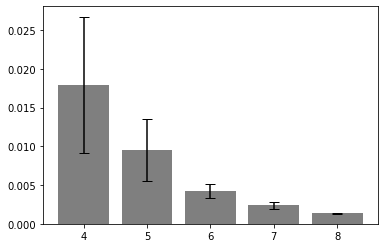

In [27]:
plt.bar(SEQ_LENS, space_norm, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, space_norm, yerr=space_err, linestyle='', capsize=5, c='k')

In [28]:
space_sizes

array([  256,  1024,  4096, 16384, 65536])

<BarContainer object of 5 artists>

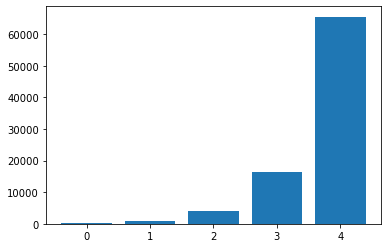

In [30]:
plt.bar(range(len(space_sizes)), space_sizes)

In [43]:
#lets try a smaller alphabet
ALPHABET = 'ACT'
SEQ_LENS = [4,5,6,7,8] 
K_VALUE  = 1
REPL     = 5
DIST     = np.random.uniform

In [44]:
results = []
for N in tqdm(SEQ_LENS): 
    repls = []
    for replicate in range(REPL):
        landscape = make_RMF(N, ALPHABET, DIST)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit(multiprocessing=True)
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)

  0%|          | 0/5 [00:00<?, ?it/s]

<ErrorbarContainer object of 3 artists>

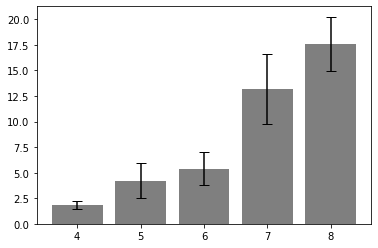

In [46]:

mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)
plt.bar(SEQ_LENS, mean_results, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')


<BarContainer object of 5 artists>

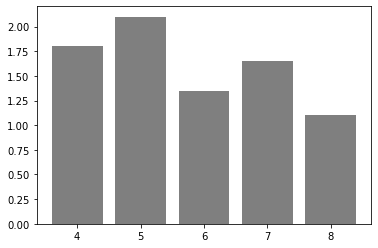

In [47]:
geo_norm = np.divide(mean_results, np.array(progression))
plt.bar(SEQ_LENS, geo_norm, color='k', alpha=0.5)


In [48]:
#it seems to be somewhat dependent on number of amino acids

  0%|          | 0/5 [00:00<?, ?it/s]

<ErrorbarContainer object of 3 artists>

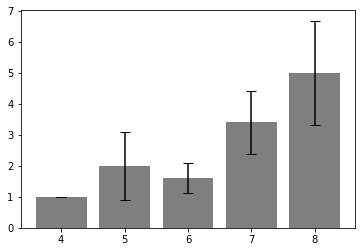

In [3]:
#lets try a smaller alphabet
ALPHABET = 'AC'
SEQ_LENS = [4,5,6,7,8] 
K_VALUE  = 1
REPL     = 5
DIST     = np.random.uniform

results = []
for N in tqdm(SEQ_LENS): 
    repls = []
    for replicate in range(REPL):
        landscape = make_RMF(N, ALPHABET, DIST)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit(multiprocessing=True)
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)


mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)
plt.bar(SEQ_LENS, mean_results, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')

<BarContainer object of 5 artists>

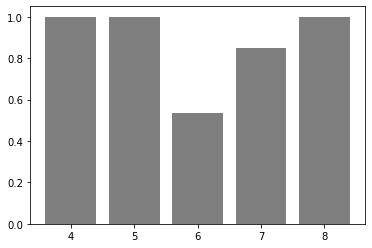

In [5]:
prog1 = [1,2,3,4,5]

geo_norm = np.divide(mean_results, np.array(prog1))
plt.bar(SEQ_LENS, geo_norm, color='k', alpha=0.5)


  0%|          | 0/5 [00:00<?, ?it/s]

<ErrorbarContainer object of 3 artists>

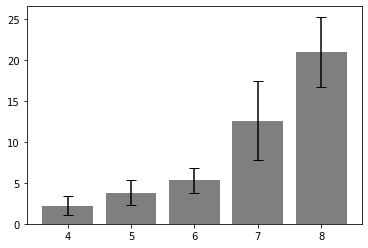

In [18]:
#lets try a smaller alphabet
ALPHABET = 'ACT'
SEQ_LENS = [4,5,6,7,8] 
K_VALUE  = 1
REPL     = 10
DIST     = np.random.uniform

results = []
for N in tqdm(SEQ_LENS): 
    repls = []
    for replicate in range(REPL):
        landscape = make_RMF(N, ALPHABET, np.random.uniform)
        estimator = NMaximaEstimator(landscape, ALPHABET).fit(multiprocessing=True)
        n_maxima  = estimator.n_maxima
        repls.append(n_maxima)
    results.append(repls)
results = np.array(results)


mean_results = np.mean(results, axis=1)
std_results  = np.std(results, axis=1)
plt.bar(SEQ_LENS, mean_results, color='k', alpha=0.5)
plt.errorbar(SEQ_LENS, mean_results, yerr=std_results, linestyle='', capsize=5, c='k')

In [21]:
gradients = np.array([N*(3-1) for N in SEQ_LENS])

In [22]:
gradients

array([ 8, 10, 12, 14, 16])

In [20]:
def geometric_progression(init, N, common_ratio): 
    out = [init]
    n=0
    while n<N:
        out.append(out[-1]*common_ratio)
        n+=1
    return out

In [21]:
prog2 = geometric_progression(1, 4, 1.5)

In [22]:
prog2

[1, 1.5, 2.25, 3.375, 5.0625]

<BarContainer object of 5 artists>

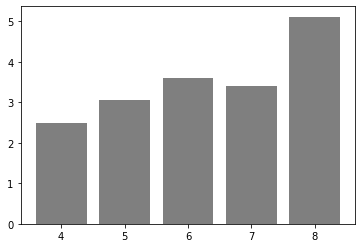

In [23]:
geo_norm2 = np.divide(mean_results, np.array(prog2))
plt.bar(SEQ_LENS, geo_norm2, color='k', alpha=0.5)


How the fuck do we normalise number of maxima

In [8]:
aas = range(1,21) #iteration over amino acids 



get_deg = lambda x: [get_degree(i,x) for i in range(1, 11)] # function defines iteration over sequence length, for a given number of aminos x

all_deg = [get_deg(j) for j in aas] # we obtain results for increasing sequence length (the inner list) as number of aminos increases (the outer)

In [7]:
def get_degree(N, A): 
    return (N*(A-1))

In [12]:
all_deg = np.array(all_deg)
all_deg

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120],
       [ 13,  26,  39,  52,  65,  78,  91, 104, 117, 130],
       [ 14,  28,  42,  56,  70,  84,  98, 112, 126, 140],
       [ 15,  30,  45,  60,  75,  90, 105, 120, 135, 150],
       [ 16,  32,  48,  64,  80,  96, 112, 128, 144, 160

In [13]:
all_deg.shape

(20, 10)

In [16]:
gradients = [[N*(A-1) for N in range(1,11)] for A in range(1,21)]

In [17]:
gradients

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 [6, 12, 18, 24, 30, 36, 42, 48, 54, 60],
 [7, 14, 21, 28, 35, 42, 49, 56, 63, 70],
 [8, 16, 24, 32, 40, 48, 56, 64, 72, 80],
 [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 [11, 22, 33, 44, 55, 66, 77, 88, 99, 110],
 [12, 24, 36, 48, 60, 72, 84, 96, 108, 120],
 [13, 26, 39, 52, 65, 78, 91, 104, 117, 130],
 [14, 28, 42, 56, 70, 84, 98, 112, 126, 140],
 [15, 30, 45, 60, 75, 90, 105, 120, 135, 150],
 [16, 32, 48, 64, 80, 96, 112, 128, 144, 160],
 [17, 34, 51, 68, 85, 102, 119, 136, 153, 170],
 [18, 36, 54, 72, 90, 108, 126, 144, 162, 180],
 [19, 38, 57, 76, 95, 114, 133, 152, 171, 190]]

From above we see that at, given that degree is given by $N(|A|-1)$, as $|A|$ increases, so too does the gradient. This is actually quite obvious -- it is simply $y=mx$, where y is degree, $m$ is $|A|-1$ and $x$ is $N$. Thus, to normalise appropriately for $N$ between different $|A|$. 

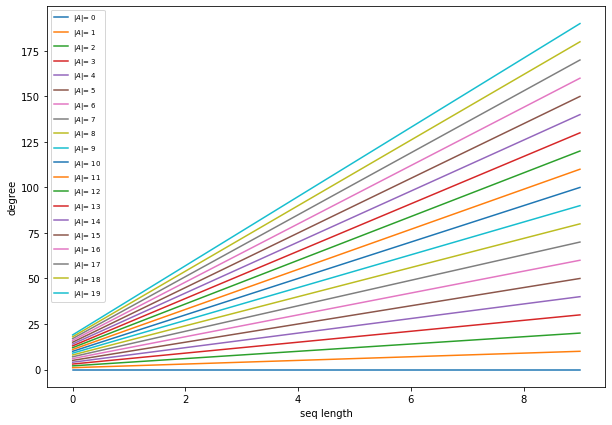

In [121]:
_ = plt.figure(figsize=(10,7))
for i in range(len(all_deg)):
    plt.plot(range(10), all_deg[i], label='$|A|$= {} '.format(i))
plt.xlabel('seq length')
plt.ylabel('degree')
plt.legend(fontsize=7)

In [69]:
#so there is an increase in the gradient of position-dependence 
# so degree increases the gradient -- we can use this to normalise potentially

In [70]:
def gradient(domain, range_): 
    rise = range_[-1]-range_[0]
    run  = domain[-1]-domain[0]
    return rise/run
    

In [71]:
grads = [gradient(range(10), i) for i in all_deg]

In [3]:
all_deg

NameError: name 'all_deg' is not defined

therefore the gradient is $|A|-1$